# Fall 2022 Model B

In [65]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Q1

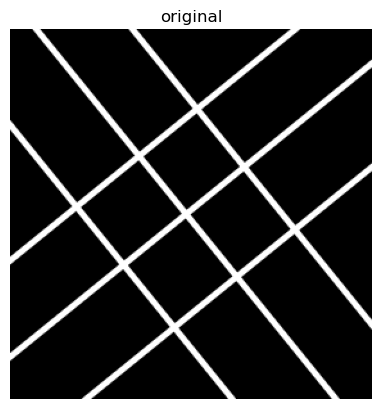

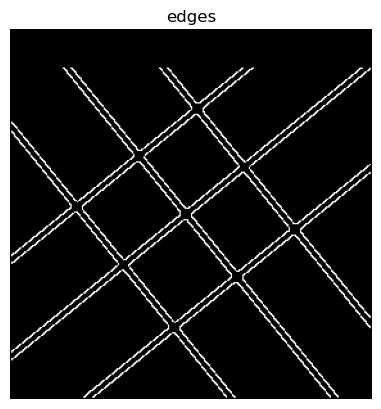

[0.93251509 0.96813457 1.00375406 1.03937354 1.07499303 1.11061251]
[(1.0749930290908867, -83.64521739130433), (1.0749930290908867, 7.513043478260897), (1.0749930290908867, 8.514782608695668), (1.0749930290908867, 9.51652173913044), (1.110612514829193, -97.6695652173913), (1.110612514829193, -96.6678260869565), (1.110612514829193, -95.66608695652172), (1.110612514829193, -94.66434782608695), (1.110612514829193, -92.66086956521738), (1.110612514829193, -91.65913043478258), (1.110612514829193, -90.65739130434781), (1.110612514829193, -89.65565217391304), (1.110612514829193, -88.65391304347824), (1.110612514829193, -87.65217391304347), (1.110612514829193, -15.526956521739123), (1.110612514829193, -14.525217391304352), (1.110612514829193, -13.523478260869524), (1.110612514829193, -12.521739130434753), (1.110612514829193, -11.519999999999982), (1.110612514829193, -10.51826086956521), (1.110612514829193, -9.51652173913044), (1.110612514829193, -8.514782608695612), (1.110612514829193, -7.5130

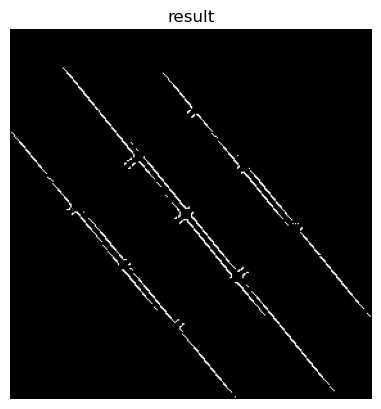

In [199]:
def hough_m_c(img, threshold=100):
    img_gray = (rgb2gray(img[:, :, :3]) * 255).astype("uint8")
    show_images([img_gray], ["original"])
    height, width = np.shape(img_gray)
    # edges
    img_edges = canny(img_gray, sigma=1, low_threshold=50, high_threshold=100)
    img_edges[:30, :] = 0
    show_images([img_edges], ["edges"])
    # hough
    m_start = np.tan(np.deg2rad(43))
    m_end = np.tan(np.deg2rad(48))
    delta_m = 0.01
    m_range = np.linspace(m_start, m_end, 6)
    print(m_range)
    c_start = -height
    c_end = height
    c_step = 10
    c_range = np.linspace(c_start, c_end, height * 2)
    A = np.zeros((len(m_range), len(c_range)))  # accumulator
    y_idxs, x_idxs = np.nonzero(img_edges)  # get edge coords
    # Fill accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]
        for m_idx, m in enumerate(m_range):
            c = y - m * x  # Calculate the intercept for this slope
            # Find the closest value of c in the c_range
            if c_start <= c <= c_end:
                c_idx = np.argmin(np.abs(c_range - c))
                A[m_idx, c_idx] += 1
    # Accumulator peaks
    lines = []
    for m_idx, c_idx in np.argwhere(A > threshold):
        lines.append((m_range[m_idx], c_range[c_idx]))

    print(lines)
    # select lines
    out_img = np.copy(img)
    edge_points = set(zip(y_idxs, x_idxs))
    for m, c in lines:
        x_vals = np.arange(width)
        y_vals = (m * x_vals + c).astype(int)

        # Validate points are within bounds and correspond to actual edge points
        valid_points = [
            (y, x)
            for y, x in zip(y_vals, x_vals)
            if 0 <= y < height and 0 <= x < width and (y, x) in edge_points
        ]

        # Extract the valid x and y values
        valid_y, valid_x = zip(*valid_points) if valid_points else ([], [])

        # Update the image
        out_img[valid_y, valid_x] = [255, 0, 255]
        mask = (out_img[:,:,0] == 255) & (out_img[:,:,1] == 0) & (out_img[:,:,2] == 255)
        out_img[~mask] = 0

    return out_img


img: np.ndarray = io.imread("Q1.png")[:, :, :3]
result = rgb2gray(hough_m_c(img, 31))
show_images([result], ["result"])

## Q2

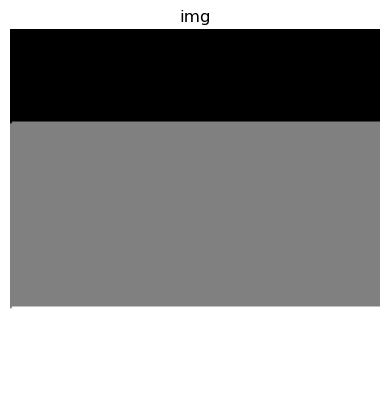

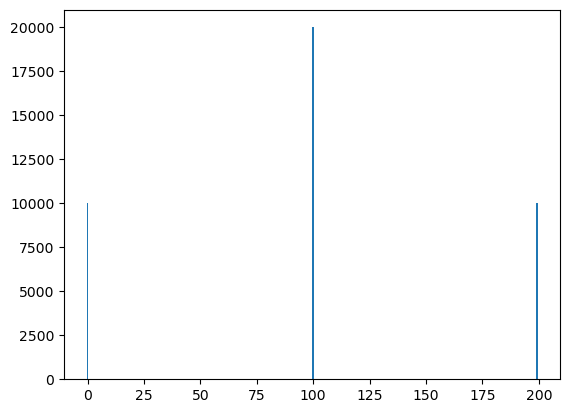

In [80]:
# part a
img = np.zeros((200, 200))
img = img.flatten()
img[10001:30001] = 100
img[30001: 40001] = 200
img = img.reshape(200, 200)
show_images([img], ["img"])
showHist(img)

32640
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 

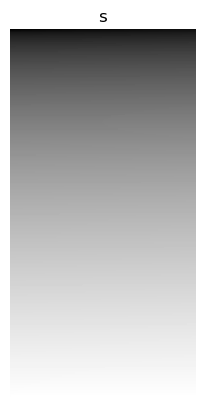

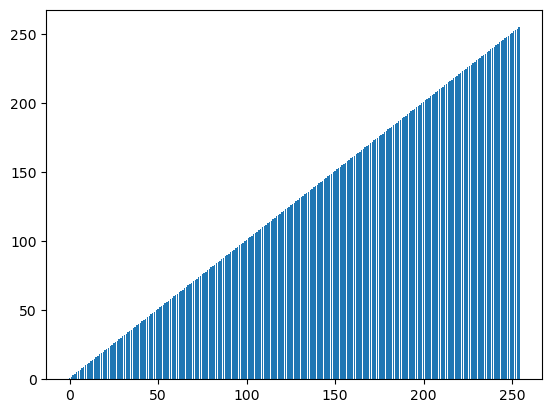

In [98]:
# part b
pixel_count = 0
for i in range(256):
    pixel_count += i

print(pixel_count)
row_c = 255
col_c = 128

img = np.zeros((row_c, col_c)).astype("uint8")
val = 0
num = 0
idx = 0
# hist eqn:
# y = x
for row in range(row_c):
    for col in range(col_c):
        img[row, col] = val
        num += 1

        if num > idx:
            val += 1
            idx += 1
            num = 0

hist,x = histogram(img)
print(hist)
show_images([img], ["s"])
showHist(img)

## Q3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


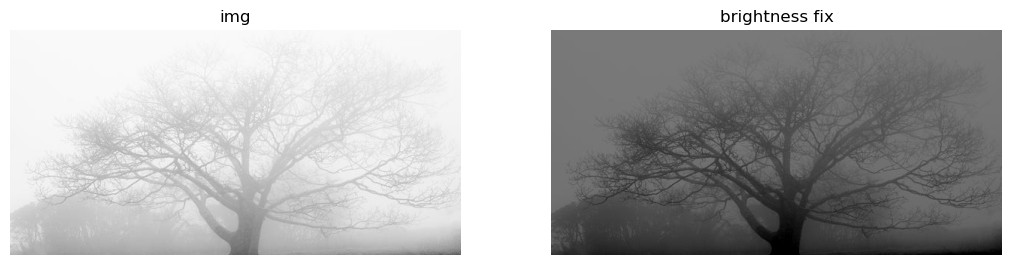

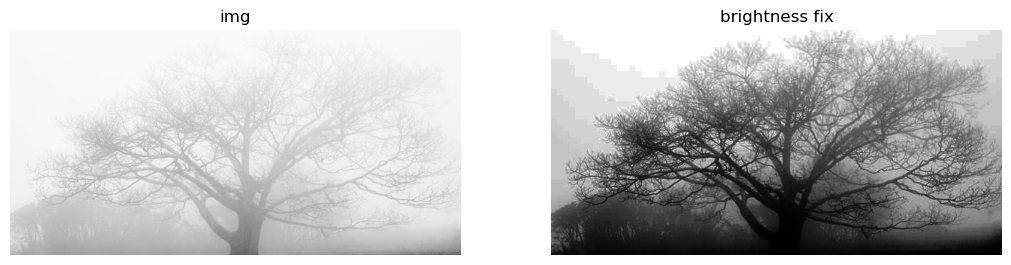

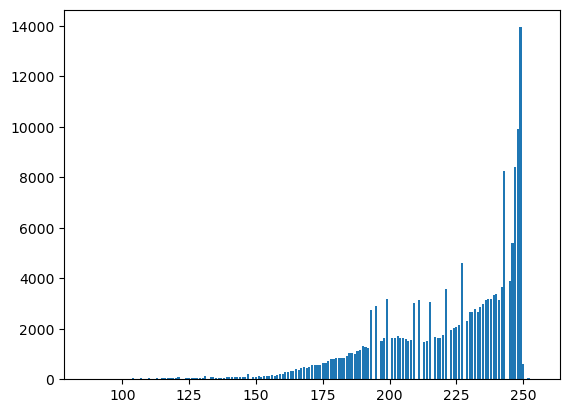

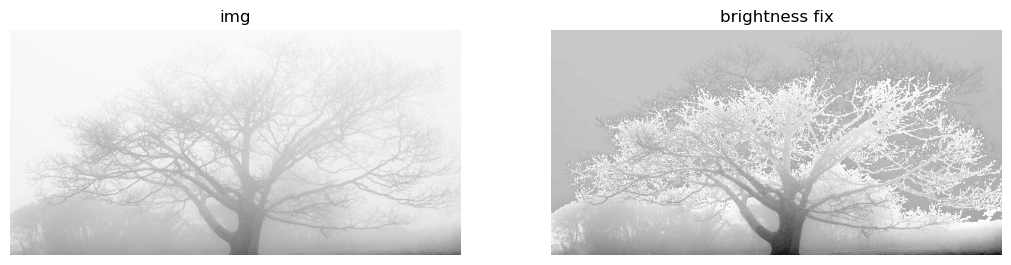

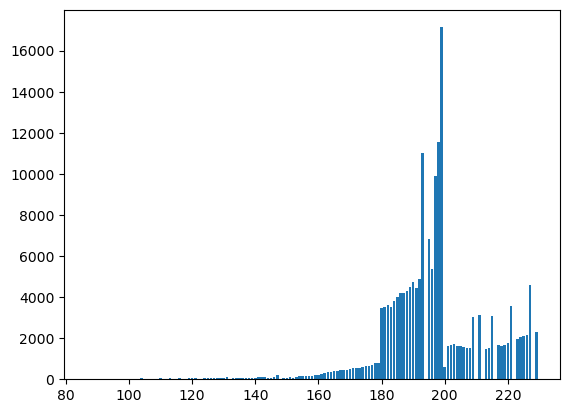

In [124]:
img : np.ndarray = io.imread("Q3.jpg")
hsv = rgb2hsv(img) 
hsv[:,:,2] -= 0.5
rgb = hsv2rgb(hsv)
show_images([img, rgb], ["img", "brightness fix"])

gray = rgb2gray(img)
gray = (gray * 255).astype("uint8")
eq = equalize_hist(gray)
show_images([img, eq], ["img", "brightness fix"])

showHist(gray)

mask = gray >= 230
new = gray.copy()
new[mask] -= 50
show_images([img, new], ["img", "brightness fix"])
showHist(new)

## Q4

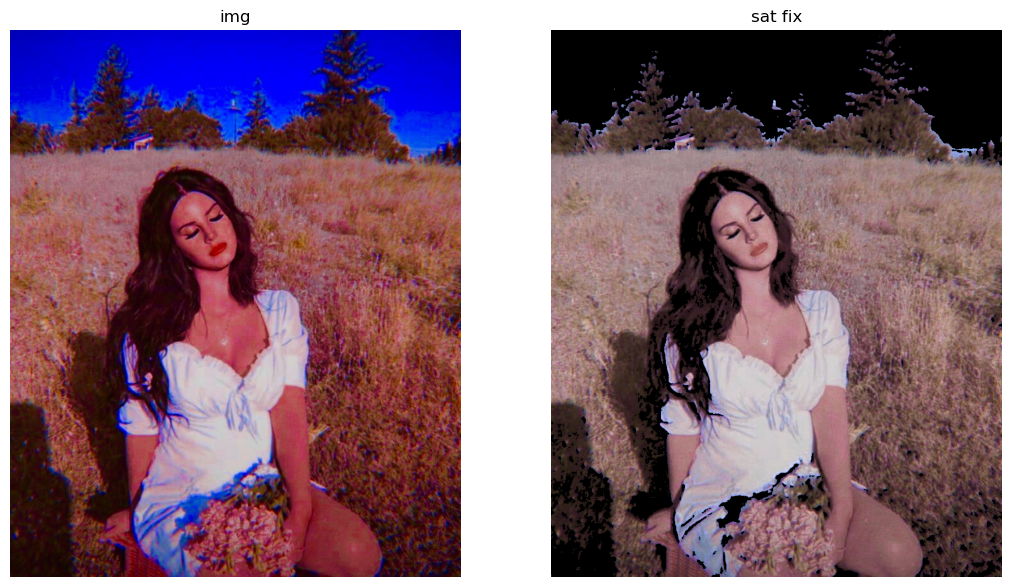

In [196]:
img = io.imread("Q4.jpg")
# sat fix
hsv = rgb2hsv(img)
mask = (img[:, :, 0] <= 40) & (img[:, :, 1] <= 120)
hsv[:, :, 1] = hsv[:, :, 1] * 0.5
rgb = hsv2rgb(hsv)
rgb[mask] = 0

show_images([img, rgb], ["img", "sat fix"])